In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#loading the cleaned dataset
df = pd.read_csv("../data/cleaned_water_quality.csv")
df.head()

,Sample Site,Sample Date,Analyte,Final Result,Units,Stream Group
0,S4,1987-01-07,Temperature,1.111110,C,Schoharie
1,S6I,1987-01-07,Temperature,0.555556,C,Schoharie
2,S8,1987-01-07,Temperature,2.222220,C,Schoharie
3,S4,1987-01-07,Scent Character,6.970000,mg/L,Schoharie
4,S6I,1987-01-07,Scent Character,6.970000,mg/L,Schoharie


In [4]:
df['Sample Date'].dtype

dtype('O')

In [5]:
#converting sample date type to date time
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

#extracting the yeat from the sample date
df['Year'] = df['Sample Date'].dt.year

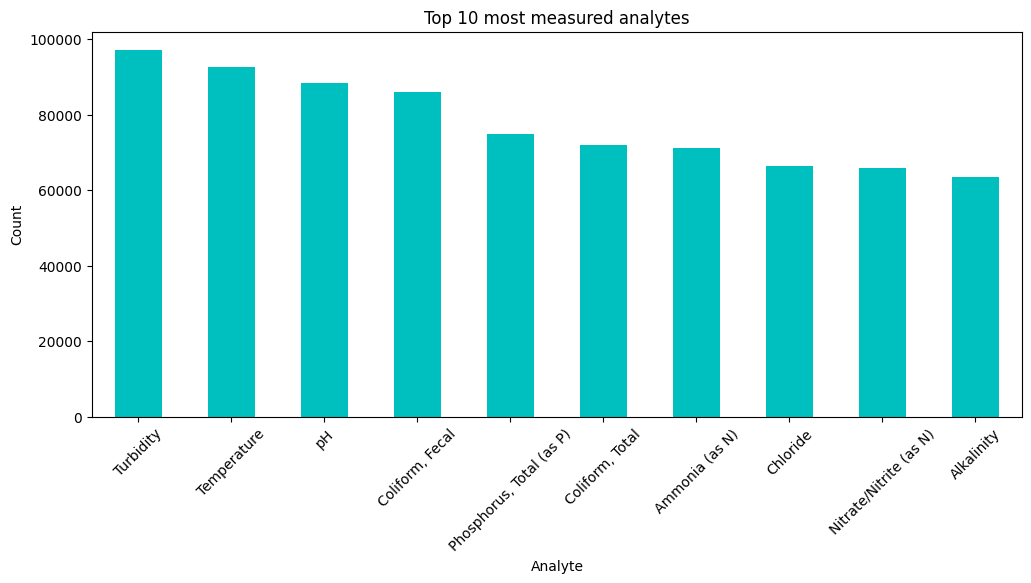

In [6]:
#top 10 most measured analytes
plt.figure(figsize=(12,5))
df['Analyte'].value_counts().head(10).plot(kind="bar", color="c")
plt.title("Top 10 most measured analytes")
plt.xlabel("Analyte")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

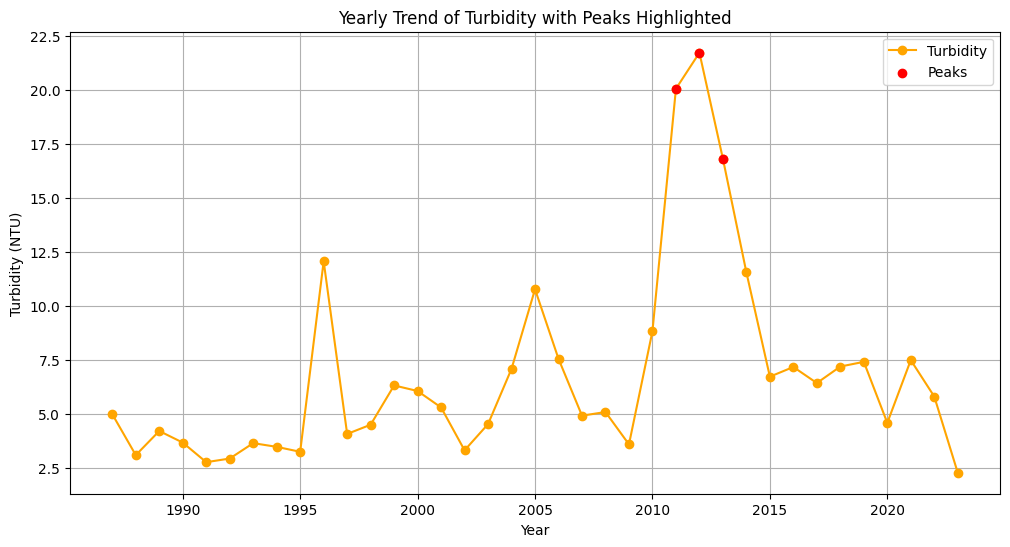

,Year,Final Result,Is_Peak
24,2011,20.065963,True
25,2012,21.737748,True
26,2013,16.819665,True


In [7]:
#trend of turbidity over time
# Filter data for Turbidity
turbidity_df = df[df['Analyte'] == 'Turbidity']

# Group by Year and calculate the mean Turbidity
turbidity_trend = turbidity_df.groupby('Year')['Final Result'].mean().reset_index()

#identifing peaks
threshold=turbidity_trend["Final Result"].mean() + 2*turbidity_trend['Final Result'].std()
turbidity_trend['Is_Peak'] = turbidity_trend['Final Result'] > threshold

# Plotting the turbidity trends with Peaks Highlighted
plt.figure(figsize=(12, 6))
plt.plot(turbidity_trend['Year'], turbidity_trend['Final Result'], marker='o', label='Turbidity', color='orange')
plt.scatter(turbidity_trend[turbidity_trend['Is_Peak']]['Year'],
            turbidity_trend[turbidity_trend['Is_Peak']]['Final Result'],
            color='red', label='Peaks', zorder=5)
plt.title('Yearly Trend of Turbidity with Peaks Highlighted')
plt.xlabel('Year')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid()
plt.show()

#display years with peaks
display(turbidity_trend[turbidity_trend['Is_Peak']])

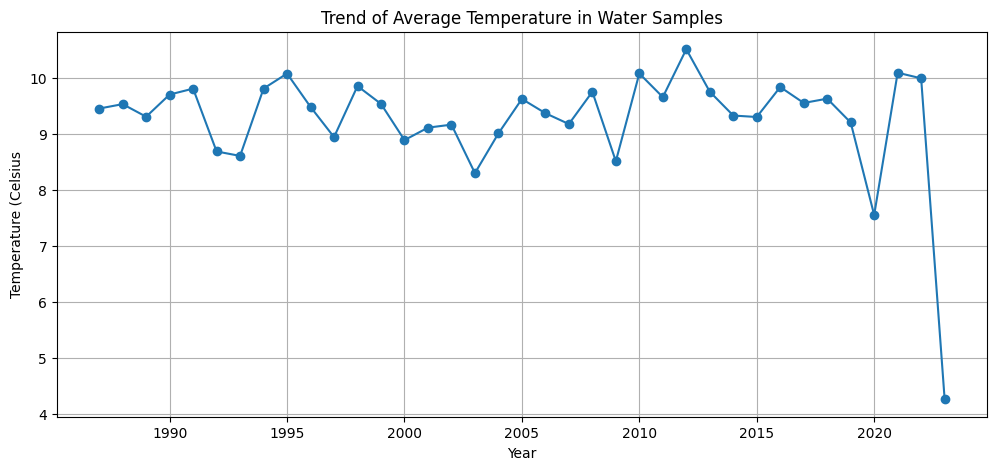

In [8]:
#trend of temperate over time
plt.figure(figsize=(12,5))
temp_df=df[df['Analyte']=='Temperature'].groupby('Year')['Final Result'].mean()
temp_df.plot(marker='o', linestyle="-")
plt.title("Trend of Average Temperature in Water Samples")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius")
plt.grid()
plt.show()

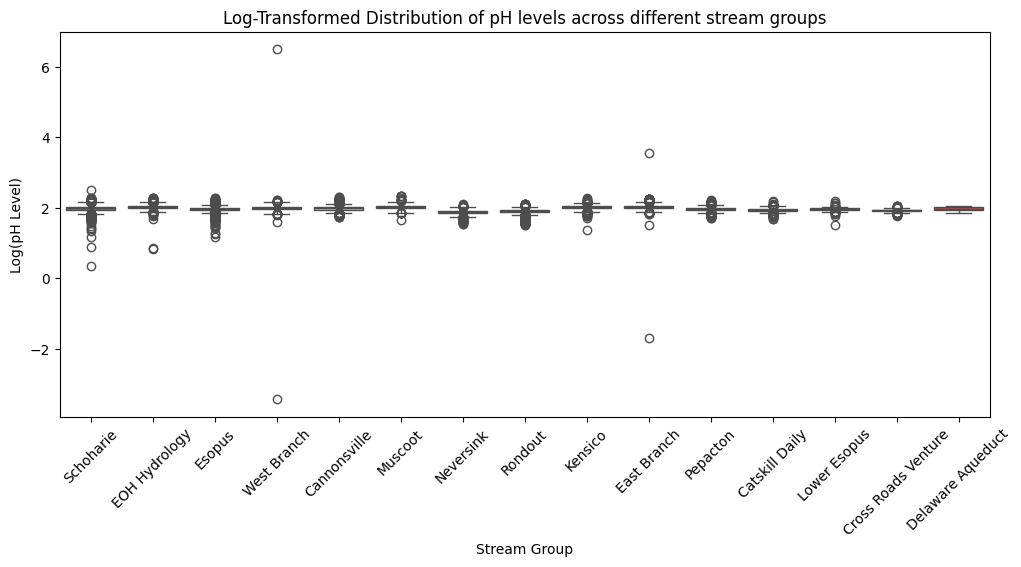

In [9]:
#boxplot of pH level across different Stream Groups

#log transforming final result for pH
df['Log Final Result'] = df['Final Result'].apply(lambda x:np.log(x) if x>0 else None)

#filter for pH and plot boxplot
plt.figure(figsize=(12,5))
sns.boxplot(x="Stream Group",y="Log Final Result", data=df[df["Analyte"]=="pH"], palette="coolwarm")
plt.title("Log-Transformed Distribution of pH levels across different stream groups")
plt.xlabel("Stream Group")
plt.ylabel("Log(pH Level)")
plt.xticks(rotation=45)
plt.show()

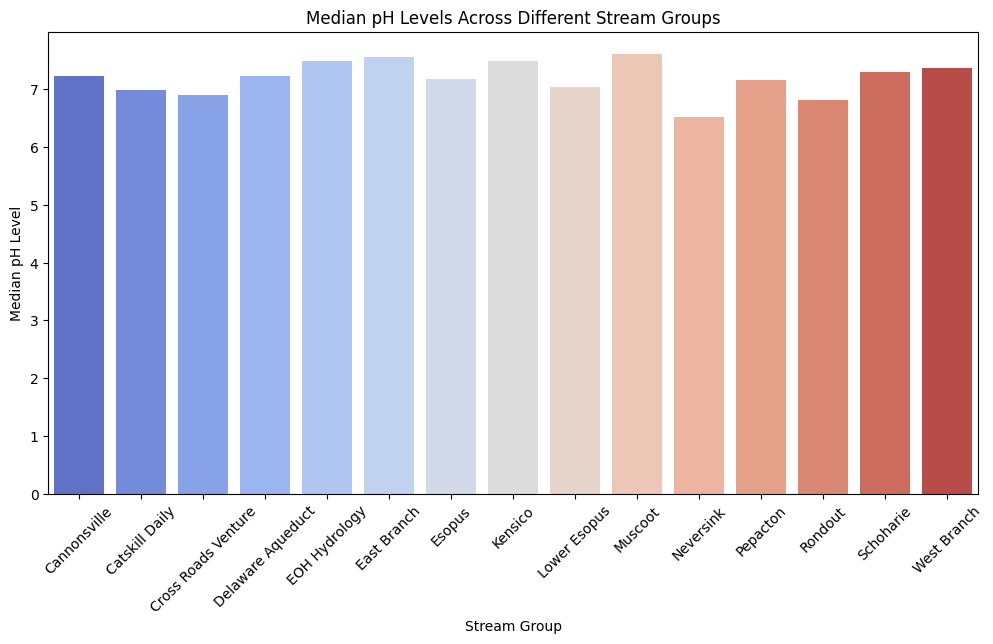

In [10]:
#aggregating pH levels by Stream Group
agg_ph = df[df['Analyte'] == 'pH'].groupby('Stream Group')['Final Result'].median().reset_index()

#bar plot of median pH levels
plt.figure(figsize=(12,6))
sns.barplot(x="Stream Group", y="Final Result", data=agg_ph, palette="coolwarm")
plt.title("Median pH Levels Across Different Stream Groups")
plt.xlabel("Stream Group")
plt.ylabel("Median pH Level")
plt.xticks(rotation=45)
plt.show()

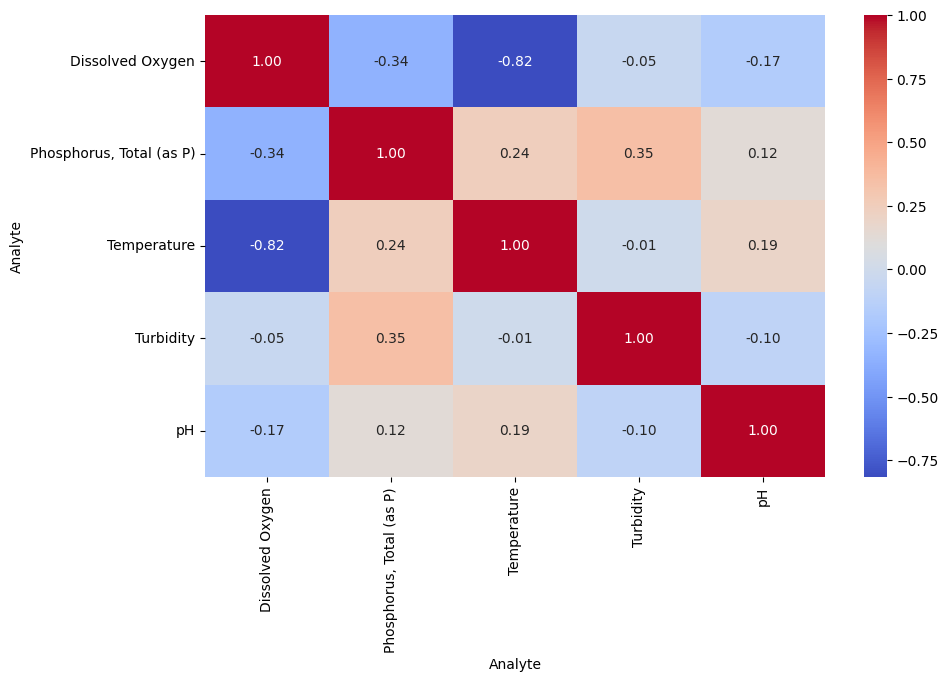

In [11]:
#correlation heatmap of key analytes
key_analytes=['Temperature', 'pH', 'Dissolved Oxygen', 'Nitrate(as N)', 'Phosphorus, Total (as P)', 'Turbidity']
subset = df[df['Analyte'].isin(key_analytes)].pivot_table(index="Sample Date", columns="Analyte", values="Final Result")
plt.figure(figsize=(10,6))
sns.heatmap(subset.corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

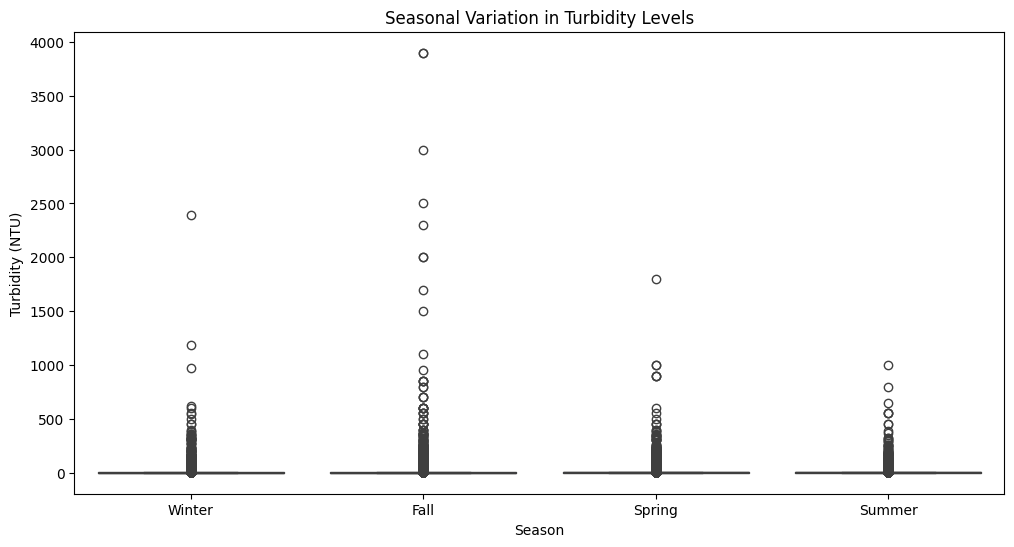

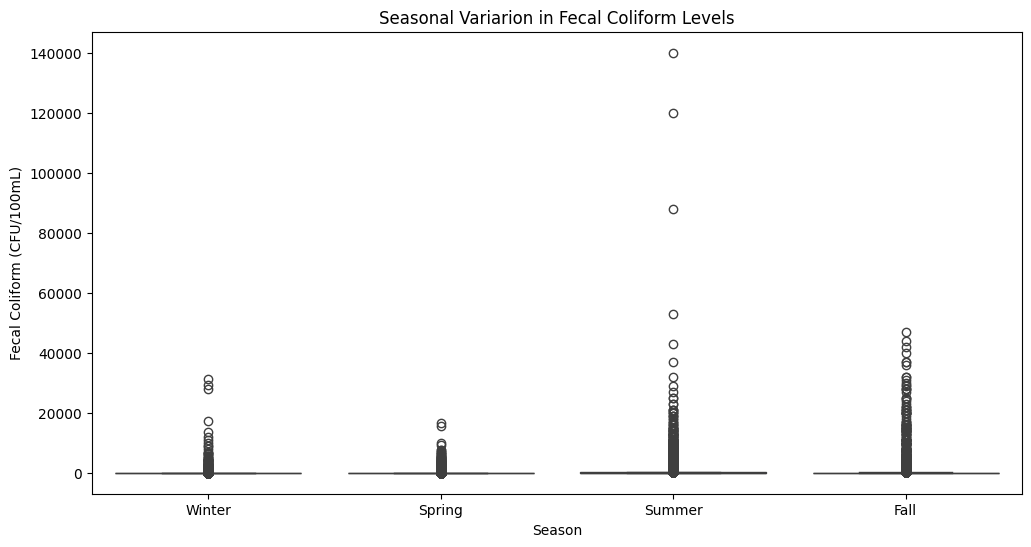

In [12]:
#seasonal trends in key analytes
df['Month']=df['Sample Date'].dt.month
df['Season']=df['Month'].apply(lambda x: 'Winter' if x in [12,1,2] else
                               'Spring' if x in [3,4,5] else
                               'Summer' if x in [6,7,8] else 'Fall')

#filtering the turbidity and plot seasonal trends
plt.figure(figsize=(12,6))
sns.boxplot(x='Season', y='Final Result', data=df[df['Analyte']=='Turbidity'])
plt.title('Seasonal Variation in Turbidity Levels')
plt.xlabel('Season')
plt.ylabel('Turbidity (NTU)')
plt.show()

#filtering the coliform (fecal) and plot seasonal trends
plt.figure(figsize=(12,6))
sns.boxplot(x='Season', y='Final Result', data=df[df['Analyte'] == 'Coliform, Fecal'])
plt.title('Seasonal Variarion in Fecal Coliform Levels')
plt.xlabel('Season')
plt.ylabel('Fecal Coliform (CFU/100mL)')
plt.show()  

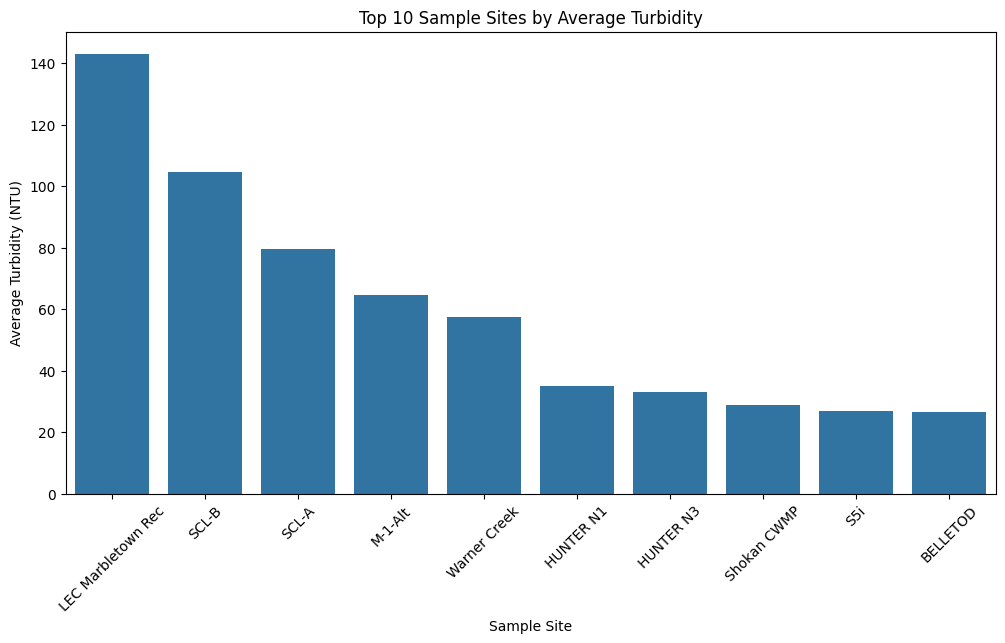

In [13]:
#visualizing average turbidity by Sample Site
turbidity_by_site=df[df['Analyte']== 'Turbidity'].groupby('Sample Site')['Final Result'].mean().reset_index()

top_sites=turbidity_by_site.nlargest(10,'Final Result')

plt.figure(figsize=(12,6))
sns.barplot(x='Sample Site', y='Final Result', data=top_sites)
plt.title('Top 10 Sample Sites by Average Turbidity')
plt.xlabel('Sample Site')
plt.ylabel('Average Turbidity (NTU)')
plt.xticks(rotation=45)
plt.show()

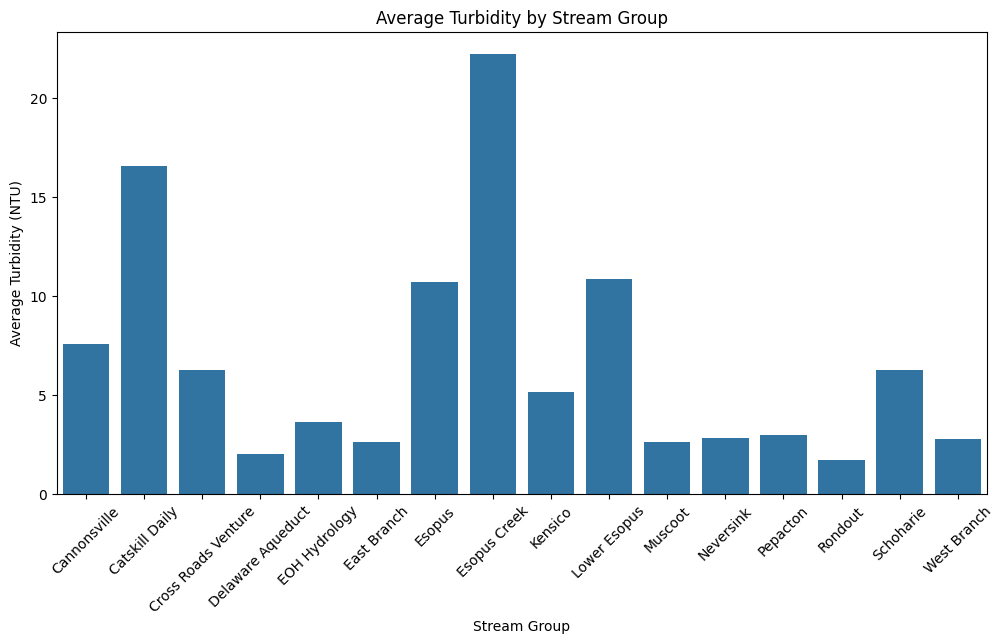

In [14]:
#aggregating turbidity by stream group
turbidity_by_group=df[df['Analyte']=='Turbidity'].groupby('Stream Group')['Final Result'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Stream Group', y='Final Result', data=turbidity_by_group)
plt.title('Average Turbidity by Stream Group')
plt.xlabel('Stream Group')
plt.ylabel('Average Turbidity (NTU)')
plt.xticks(rotation=45)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


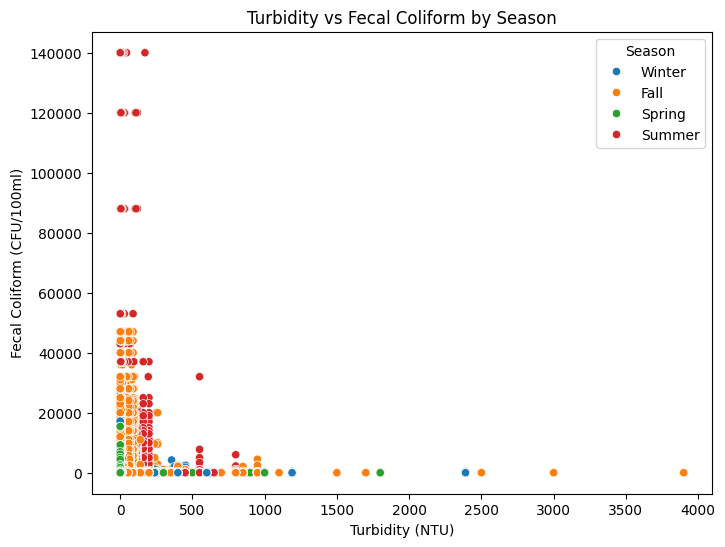

In [15]:
#exploring fecal coliforma and turbidity relationships
#merging turbidity and fecal coliform data by site and season
turbidity_data=df[df['Analyte']=='Turbidity']
coliform_data=df[df['Analyte']=='Coliform, Fecal']
merged_data=turbidity_data.merge(coliform_data, on=['Sample Site', 'Season'], suffixes=('_Turbidity','_Coliform'))

plt.figure(figsize=(8,6))
sns.scatterplot(x='Final Result_Turbidity', y='Final Result_Coliform', hue='Season', data=merged_data)
plt.title('Turbidity vs Fecal Coliform by Season')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Fecal Coliform (CFU/100ml)')
plt.legend(title='Season')
plt.show()

/var/folders/2t/5z71t9kj2yb0syg9m7v2fbnr0000gn/T/ipykernel_932/2900307711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turbidity_data['Z_Score_Turbidity'] = zscore(turbidity_data['Final Result'])


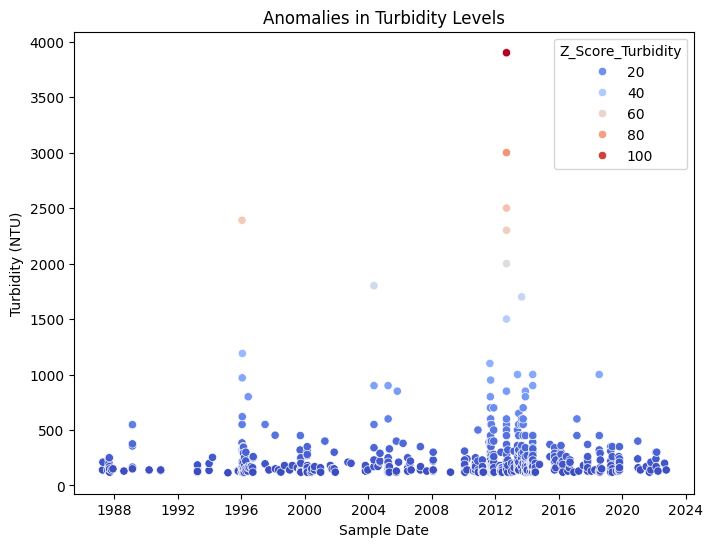

Anomalies Turbidity Data:


,Sample Site,Sample Date,Analyte,Final Result,Units,Stream Group,Year,Log Final Result,Month,Season,Z_Score_Turbidity
9221,WDL,1987-04-06,Turbidity,140.0,NTU,Esopus,1987,4.941642,4,Spring,3.699076
9340,SCL,1987-04-06,Turbidity,140.0,NTU,Esopus,1987,4.941642,4,Spring,3.699076
10285,SCL,1987-04-13,Turbidity,210.0,NTU,Esopus,1987,5.347108,4,Spring,5.635990
22634,E3,1987-07-28,Turbidity,140.0,NTU,Esopus,1987,4.941642,7,Summer,3.699076
26102,E15,1987-08-25,Turbidity,170.0,NTU,Esopus,1987,5.135798,8,Summer,4.529182
...,...,...,...,...,...,...,...,...,...,...,...
1634629,S10-RF,2022-02-23,Turbidity,170.0,NTU,Schoharie,2022,5.135798,2,Winter,4.529182
1635525,CTNHG,2022-03-08,Turbidity,300.0,NTU,Cannonsville,2022,5.703782,3,Spring,8.126307
1637349,NCG,2022-04-07,Turbidity,130.0,NTU,Neversink,2022,4.867534,4,Spring,3.422375
1646804,CTNHG,2022-09-06,Turbidity,200.0,NTU,Cannonsville,2022,5.298317,9,Fall,5.359288


In [16]:
#identify anomalies inturbidity and coliform levels
#calculating z-scores for turbidity
turbidity_data['Z_Score_Turbidity'] = zscore(turbidity_data['Final Result'])

#identifying anomalies (z-scores>3)
anomalies=turbidity_data[turbidity_data['Z_Score_Turbidity'].abs() >3]

#highlighting anomalies on scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sample Date', y='Final Result', hue='Z_Score_Turbidity', data=anomalies, palette='coolwarm')
plt.title('Anomalies in Turbidity Levels')
plt.xlabel('Sample Date')
plt.ylabel('Turbidity (NTU)')
plt.show()

print("Anomalies Turbidity Data:")
anomalies

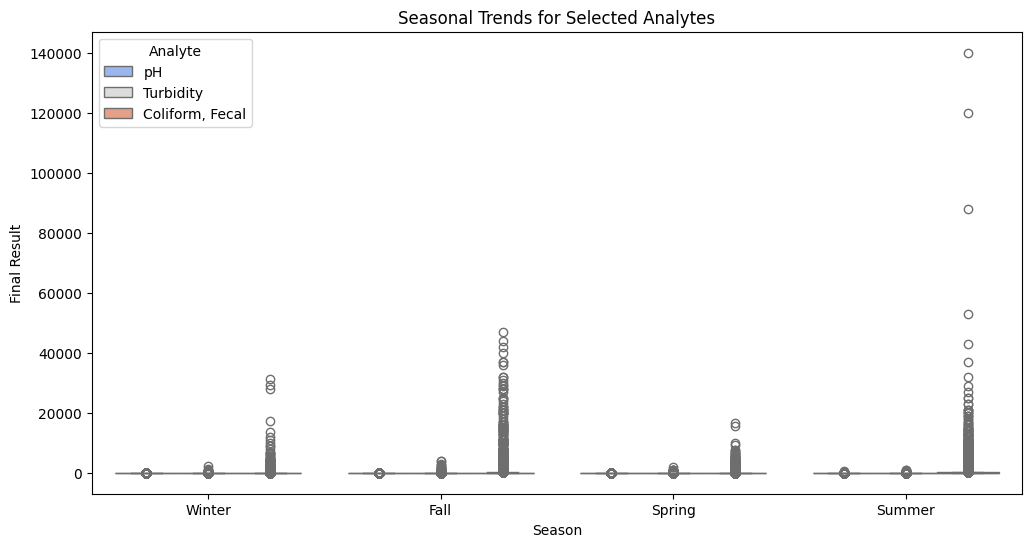

In [17]:
#seasonal trends for multiple analytes
analytes_of_interest = ['Turbidity', 'Coliform, Fecal', 'pH']
seasonal_data=df[df['Analyte'].isin(analytes_of_interest)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Season', y='Final Result', hue='Analyte', data=seasonal_data, palette='coolwarm')
plt.title('Seasonal Trends for Selected Analytes')
plt.xlabel('Season')
plt.ylabel('Final Result')
plt.legend(title='Analyte')
plt.show()

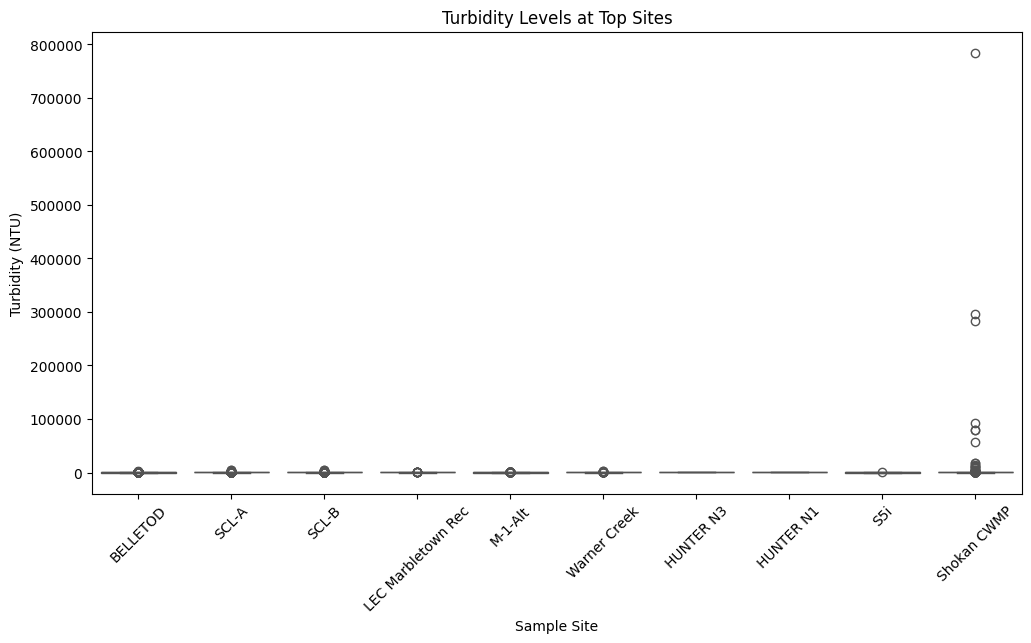

In [18]:
# Filter data for top 10 turbidity sites
top_turbidity_sites = df[df['Sample Site'].isin(top_sites['Sample Site'])]

# Boxplot of turbidity levels at top sites
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sample Site', y='Final Result', data=top_turbidity_sites, palette='coolwarm')
plt.title('Turbidity Levels at Top Sites')
plt.xlabel('Sample Site')
plt.ylabel('Turbidity (NTU)')
plt.xticks(rotation=45)
plt.show()

In [19]:
df.head()

,Sample Site,Sample Date,Analyte,Final Result,Units,Stream Group,Year,Log Final Result,Month,Season
0,S4,1987-01-07,Temperature,1.111110,C,Schoharie,1987,0.105360,1,Winter
1,S6I,1987-01-07,Temperature,0.555556,C,Schoharie,1987,-0.587786,1,Winter
2,S8,1987-01-07,Temperature,2.222220,C,Schoharie,1987,0.798507,1,Winter
3,S4,1987-01-07,Scent Character,6.970000,mg/L,Schoharie,1987,1.941615,1,Winter
4,S6I,1987-01-07,Scent Character,6.970000,mg/L,Schoharie,1987,1.941615,1,Winter


In [21]:
#saving the updated dataframe with all features
df.to_csv("visualized_water_quality.csv", index=False)
print("New Features saved to 'visualized_water_quality.csv")

New Features saved to 'visualized_water_quality.csv
